In [0]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
tf.enable_eager_execution()

TensorFlow 2.x selected.


In [5]:
bank_data = pd.read_csv("/content/drive/My Drive/machine learning folder/deep learning/bank.csv")  
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_data.shape
#data has 10000 rows and 14 columns
#target column=Exited

(10000, 14)

In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
bank_data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
bank_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
bank_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
bank_data.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
bank_data.shape
#no of raws are the same as previous, so there is no missing value and no duplicate value

(10000, 14)

In [0]:
##Drop the columns which are unique for all users like IDs (2.5 points)
bank_data.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace=True)

In [15]:
#Distinguish the feature and target set (2.5 points)
bank_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

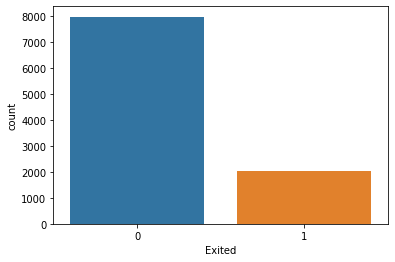

In [14]:
sns.countplot(x = "Exited", data = bank_data)

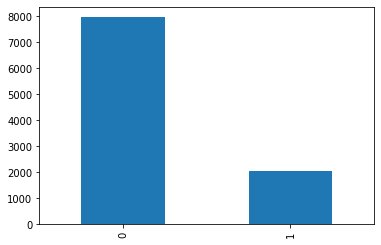

In [16]:
bank_data['Exited'].value_counts().plot(kind= 'bar')

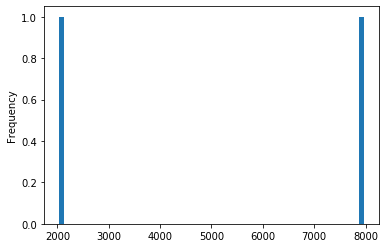

In [17]:
bank_data['Exited'].value_counts().plot(kind= 'hist', bins=70)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3935bab70>,
      dtype=object)

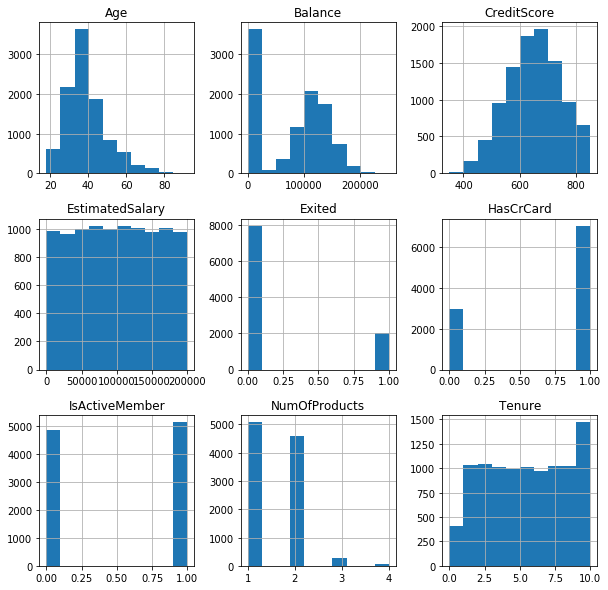

In [18]:
bank_data.hist(figsize=(10,10))

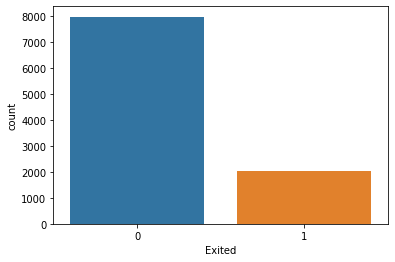

In [19]:
import seaborn as sns
sns.countplot(x='Exited',data=bank_data)

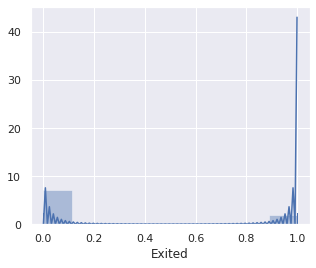

In [21]:
sns.set(rc={'figure.figsize':(5,4)})
sns.distplot(bank_data['Exited'],hist=True,rug=True,bins=9,kde=True)
#plt.xticks(range(0, 100, 10))

In [22]:
bank_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

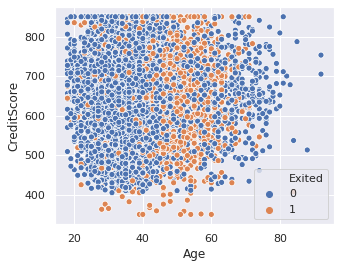

In [24]:
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=bank_data)

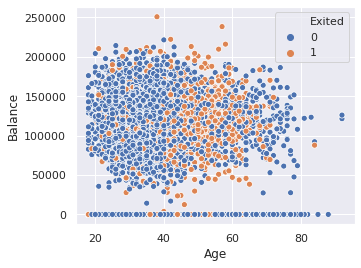

In [25]:
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=bank_data)

In [26]:
bank_data['Gender'].value_counts()
#no of male and female 

Male      5457
Female    4543
Name: Gender, dtype: int64

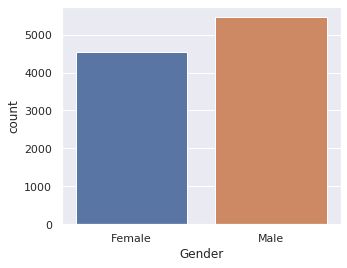

In [30]:
import seaborn as sns
sns.countplot(x='Gender',data=bank_data)

In [27]:
bank_data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [28]:
bank_data['IsActiveMember'].value_counts()
#here we can see that 5151 are active members

1    5151
0    4849
Name: IsActiveMember, dtype: int64

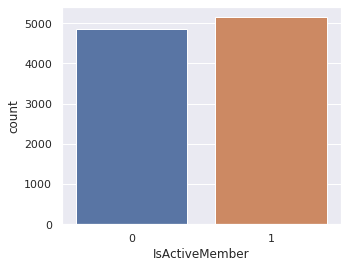

In [31]:
import seaborn as sns
sns.countplot(x='IsActiveMember',data=bank_data)


In [29]:
bank_data['HasCrCard'].value_counts()
#7055 has credit card

1    7055
0    2945
Name: HasCrCard, dtype: int64

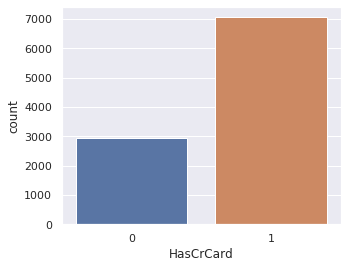

In [32]:
sns.countplot(x = "HasCrCard", data = bank_data)

In [0]:
#Label Encoding columns "Geography" and "Gender" for coverting categorical data in neumerical 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
bank_data['Geography'] = labelencoder.fit_transform(bank_data["Geography"])
bank_data['Gender'] = labelencoder.fit_transform(bank_data["Gender"])

In [36]:
bank_data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1
9999,792,0,0,28,4,130142.79,1,1,0,38190.78,0


In [37]:
bank_data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
836,694,2,0,37,3,0.00,2,1,1,147012.22,0
2450,589,0,0,46,10,107238.85,2,1,0,37024.28,0
9052,768,1,0,47,5,104552.61,1,1,0,48137.08,1
2136,727,0,1,18,4,133550.67,1,1,1,46941.41,0
862,725,0,1,41,7,113980.21,1,1,1,116704.25,0
4429,626,0,1,38,7,141074.59,1,1,0,52795.56,1
8075,850,0,1,58,8,156652.13,1,0,0,25899.21,1
545,842,2,0,44,2,112652.08,2,1,0,126644.98,0
4334,705,2,0,57,3,0.00,2,1,1,34134.14,0
3365,671,2,0,34,5,130929.02,4,1,1,28238.25,1


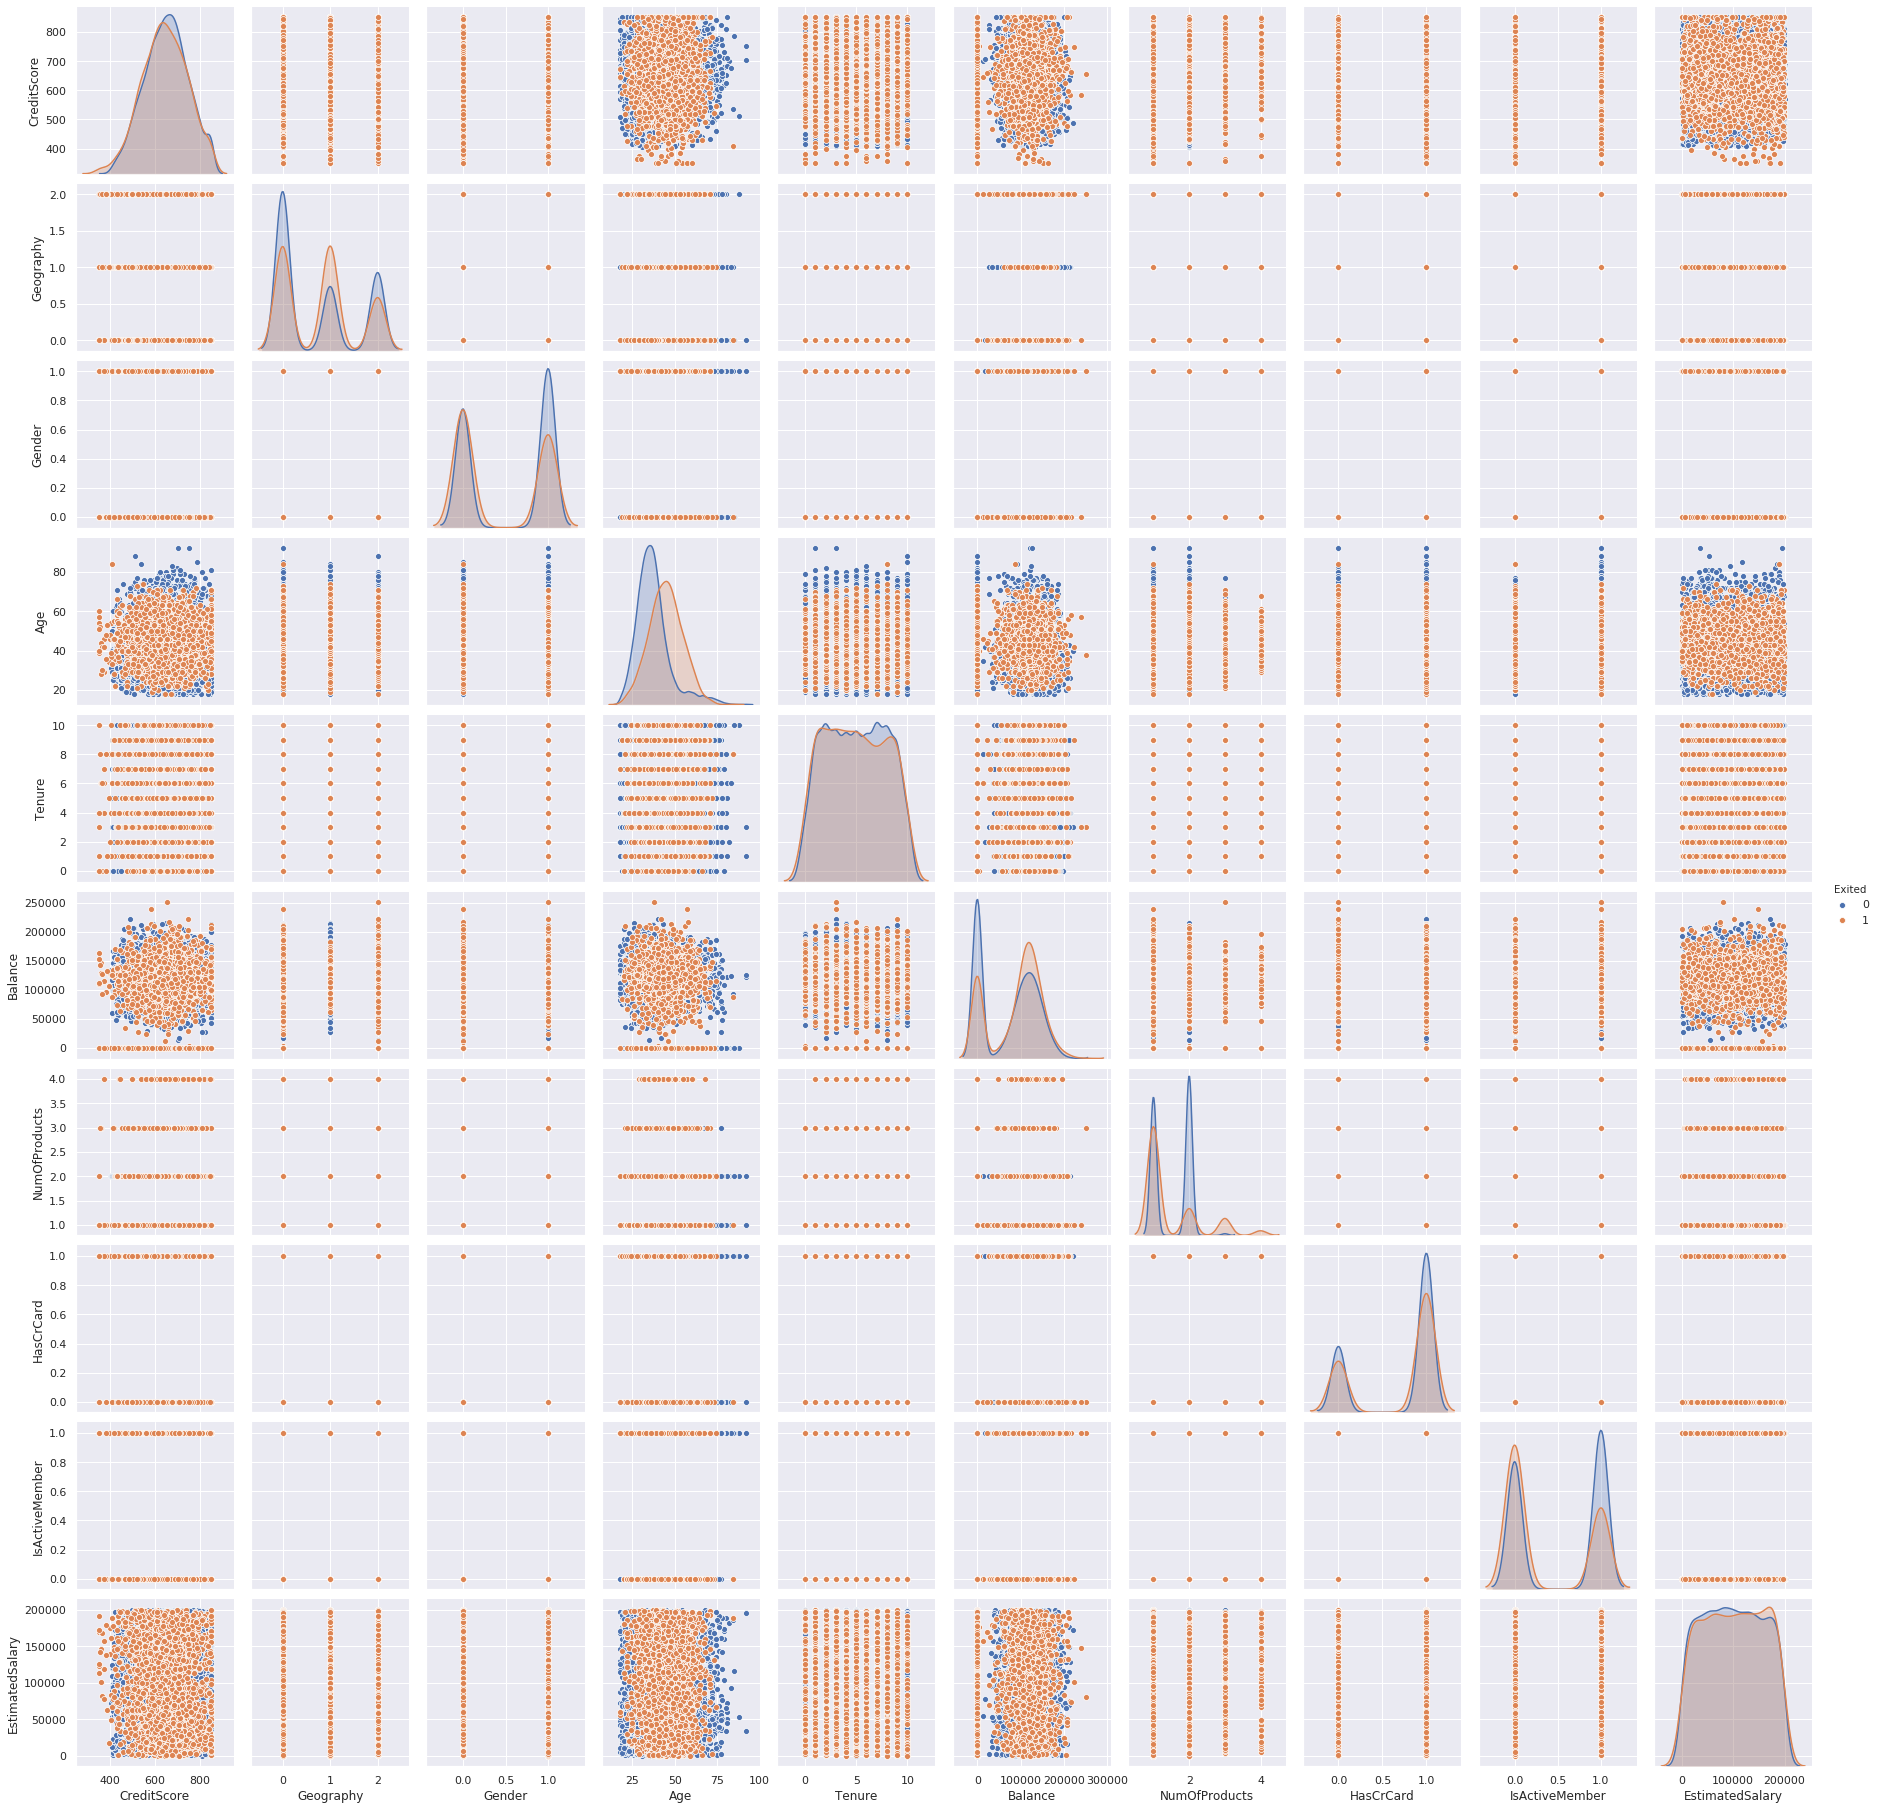

In [38]:
sns.pairplot(bank_data, diag_kind= 'kde', hue='Exited')

In [0]:
#In Age column,we see a decent separating between 0 and 1 in "Exited"
#In Age and EstimatedSalary column we see a cluster with people Exited age between approx 22 to 65

In [39]:
bank_data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


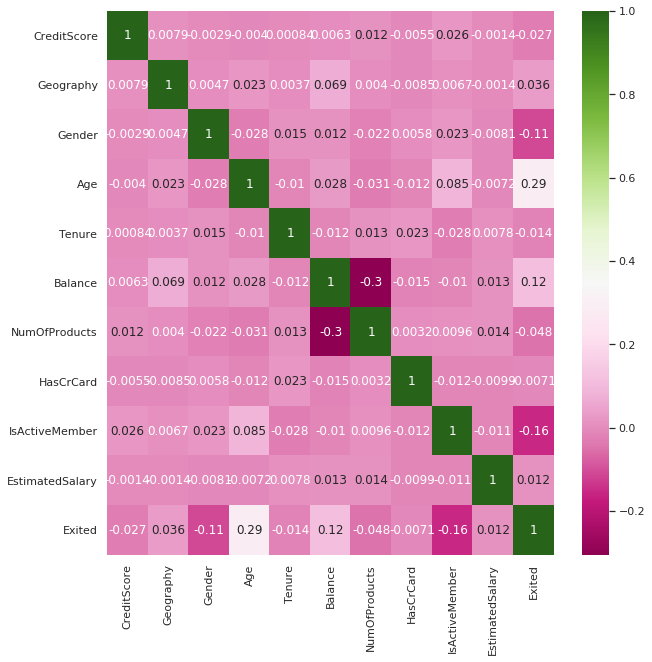

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(bank_data.corr(),annot=True,cbar=True, cmap="PiYG", ax=ax)

In [0]:
#Divide the data set into training and test sets ( 2.5 points)
# Independent variable 
X = bank_data.drop(["Exited"], axis=1)
# Target variable
y = bank_data["Exited"]

In [0]:
#splitting 70:30 training and test set
test_size = 0.30 
seed = 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [44]:
print("Training Dataset shape is  {0}".format(X_train.shape))


Training Dataset shape is  (7000, 10)


In [45]:
print("Testing Dataset shape is {0}".format(X_test.shape))

Testing Dataset shape is (3000, 10)


In [0]:
#Normalize the train and test data (5 points)
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler()
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [0]:
#  Initialize & build the model (10 points)
#Initialize Sequential model
model = tf.keras.models.Sequential()
#Add Dense Layer to create a hidden layer of 6 neurons with Relu activation
model.add(tf.keras.layers.Dense(6,  activation='relu', input_shape=(10,)))
#Add Dense Layer to create a hidden layer of 6 neurons with Relu activation
model.add(tf.keras.layers.Dense(6,  activation='relu'))
#lets' add Dense Layer which provides 1 Outputs with sigmoid activation.
model.add( tf.keras.layers.Dense(1,activation='sigmoid', name='output'))
#Compile the model with binary_crossentropy loss and sgd optimizer
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# set early stopping with patience=5  
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with no.of epochs=250
model.fit(X_train,y_train,      
          validation_data=(X_test,y_test),
          epochs=250,
          callbacks=[callback])

Train on 7000 samples, validate on 3000 samples
Epoch 1/250
7000/7000 [==============================] - 0s 64us/sample - loss: 0.3491 - accuracy: 0.8581 - val_loss: 0.3504 - val_accuracy: 0.8550
Epoch 2/250
7000/7000 [==============================] - 0s 63us/sample - loss: 0.3496 - accuracy: 0.8576 - val_loss: 0.3499 - val_accuracy: 0.8573
Epoch 3/250
7000/7000 [==============================] - 0s 67us/sample - loss: 0.3493 - accuracy: 0.8571 - val_loss: 0.3493 - val_accuracy: 0.8553
Epoch 4/250
7000/7000 [==============================] - 0s 64us/sample - loss: 0.3492 - accuracy: 0.8581 - val_loss: 0.3493 - val_accuracy: 0.8553
Epoch 5/250
7000/7000 [==============================] - 0s 63us/sample - loss: 0.3493 - accuracy: 0.8573 - val_loss: 0.3490 - val_accuracy: 0.8560
Epoch 6/250
7000/7000 [==============================] - 0s 65us/sample - loss: 0.3490 - accuracy: 0.8580 - val_loss: 0.3496 - val_accuracy: 0.8567
Epoch 7/250
7000/7000 [==============================] - 0s 64us

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
output (Dense)               (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [0]:
#Predict the results using 0.5 as a threshold (5 points)
y_model_pred = model.predict(X_test)
y_pred = (y_model_pred > 0.5) 

In [54]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [55]:
#Print the Accuracy score and confusion matrix (2.5 points)
confusion_matrix(y_test, y_pred)

array([[2298,   75],
       [ 358,  269]])

In [56]:
score = model.evaluate(X_train, y_train)
print('\n', 'Training accuracy is', score[1]*100)

7000/7000 [==============================] - 0s 34us/sample - loss: 0.3470 - accuracy: 0.8576

 Training accuracy is 85.75714230537415


In [57]:
score = model.evaluate(X_test, y_test)
print('\n', 'Testing accuracy is', score[1]*100)

3000/3000 [==============================] - 0s 34us/sample - loss: 0.3486 - accuracy: 0.8557

 Testing accuracy is 85.56666374206543


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2373
           1       0.78      0.43      0.55       627

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [0]:
#In neural network we get train accuracy 85.75714% & test accuracy 85.5666%
# Here we see that the recall score is 43%
#f1-score is 55%
##precision is 78%